# Deep Learning - Prédictions sur nos données tabulaires à l'aide d'un réseau de neurones denses (DNN)

## Implémentation d'un modèle Perceptron multicouches (MLP)

# Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix


In [2]:
# Création d'un dictionnaire avec les noms des colonnes comme clés et "catégorie" comme valeurs

df_dtypes = {
  "catr"       :"category",
  "circ"       :"category",
  "prof"       :"category",
  "plan"       :"category",
  "surf"       :"category",
  "situ"       :"category",
  "lum"        :"category",
  "agg"        :"category",
  "int"        :"category",
  "atm"        :"category",
  "col"        :"category",
  "infra"      :"category",
  "obs"        :"category",
  "obsm"       :"category",
  "choc"       :"category",
  "manv"       :"category",
  "num_veh"    :"category",
  "catv_Label" :"category",
  "catu"       :"category",
  "sexe"       :"category",
  "trajet"     :"category",
  "secuUn"     :"category",
  "secuDeux"   :"category",
  "tranches_ages" :"category",
  "num_acc"    :"category",
  "mois"       :"category",
  "jour"       :"category",
  "com"        :"category",
  "dep"        :"category",
  "annee_x_x"  :"category",
  "date"       :"category",
  "jour_de_la_semaine"    :"category",
  "heure"      :"category",
  "nbv"        :"category",
  "vosp"       :"category",
  "place"      :"category"
}

# Import du fichier fusion3 dans un DataFrame

In [3]:
df = pd.read_csv(r"../data/fusion3.csv", dtype=df_dtypes, low_memory=False)

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop(['Unnamed: 0','num_acc','an_nais','an_naiss','age_acc_an','num_veh','senc','occutc','permis','secuDeux','date'], axis=1)
df['place'] = df['place'].astype('object')
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2291739 entries, 0 to 2291796
Data columns (total 35 columns):
 #   Column              Dtype   
---  ------              -----   
 0   place               object  
 1   catu                category
 2   grav                object  
 3   sexe                category
 4   trajet              category
 5   locp                object  
 6   actp                object  
 7   etatp               object  
 8   secuUn              category
 9   tranches_ages       category
 10  catr                category
 11  circ                category
 12  nbv                 category
 13  vosp                category
 14  prof                category
 15  plan                category
 16  surf                category
 17  infra               category
 18  situ                category
 19  obs                 category
 20  obsm                category
 21  choc                category
 22  manv                category
 23  catv_Label          category
 24  lum

<h1>Encodage des variables</h1>

Les variables sont encodées une à une afin de pallier à un déficit de mémoire sur certaines machines.

In [6]:
df = pd.get_dummies(df, columns=['catu'])

In [7]:
le = LabelEncoder()
df['sexe'] = le.fit_transform(df['sexe'])

In [8]:
df = pd.get_dummies(df, columns = ['trajet'])

In [9]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.02

# Identifier les catégories rares
#rare_categories = df['locp'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['locp'] = df['locp'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['locp'])

In [10]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.02

# Identifier les catégories rares
#rare_categories = df['actp'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['actp'] = df['actp'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['actp'])

In [11]:
df = pd.get_dummies(df, columns = ['etatp'])

In [12]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.01

# Identifier les catégories rares
#rare_categories = df['secuUn'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['secuUn'] = df['secuUn'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['secuUn'])

In [13]:
df = pd.get_dummies(df, columns = ['tranches_ages'])

In [14]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.01

# Identifier les catégories rares
#rare_categories = df['catr'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['catr'] = df['catr'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['catr'])

In [15]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.01

# Identifier les catégories rares
#rare_categories = df['circ'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['circ'] = df['circ'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['circ'])

In [16]:
# Binary Encoding
df['vosp'] = df['vosp'].apply(lambda x: 0 if x == 'Sans objet(0)' else 1)

In [17]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.05

# Identifier les catégories rares
#rare_categories = df['prof'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['prof'] = df['prof'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['prof'])

In [18]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.05

# Identifier les catégories rares
#rare_categories = df['plan'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['plan'] = df['plan'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['plan'])

In [19]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.02

# Identifier les catégories rares
#rare_categories = df['surf'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['surf'] = df['surf'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['surf'])

In [20]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.02

# Identifier les catégories rares
#rare_categories = df['infra'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['infra'] = df['infra'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['infra'])

In [21]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.05

# Identifier les catégories rares
#rare_categories = df['situ'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['situ'] = df['situ'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['situ'])

In [22]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.02

# Identifier les catégories rares
#rare_categories = df['obs'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['obs'] = df['obs'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['obs'])

In [23]:
# Seuil pour le regroupement des catégories rares
#threshold = 0.01

# Identifier les catégories rares
#rare_categories = df['obsm'].value_counts(normalize=True)
#rare_categories = rare_categories[rare_categories < threshold].index

# Remplacer les catégories rares par 'Autre'
#df['obsm'] = df['obsm'].replace(rare_categories, 'Autre')

# One-Hot Encoding
df = pd.get_dummies(df, columns=['obsm'])

In [24]:
# Regrouper la catégorie "Non renseigné" avec "Aucun"
df['choc'] = df['choc'].replace('Non renseigné', 'Aucun')

# Effectuer le one-hot encoding
df = pd.get_dummies(df, columns=['choc'])


In [25]:
frequency_encoding = df['manv'].value_counts(normalize=True)
df['manv'] = df['manv'].map(frequency_encoding)

In [26]:
frequency_encoding = df['catv_Label'].value_counts(normalize=True)
df['catv_Label'] = df['catv_Label'].map(frequency_encoding)

In [27]:
frequency_encoding = df['dep'].value_counts(normalize=True)
df['dep'] = df['dep'].map(frequency_encoding)

In [28]:
frequency_encoding = df['com'].value_counts(normalize=True)
df['com'] = df['com'].map(frequency_encoding)

In [29]:
df = pd.get_dummies(df, columns = ['lum'])

In [30]:
df['agg'] = df['agg'].replace({'En agglomération': 1, 'Hors agglomération': 0})

In [31]:
df = pd.get_dummies(df, columns = ['int'])

In [32]:
df = pd.get_dummies(df, columns = ['atm'])

In [33]:
df = pd.get_dummies(df, columns = ['col'])

In [34]:
df = pd.get_dummies(df, columns = ['jour_de_la_semaine'])

In [35]:
df.shape

(2291739, 195)

In [36]:
df.columns

Index(['place', 'grav', 'sexe', 'nbv', 'vosp', 'manv', 'catv_Label', 'agg',
       'com', 'dep',
       ...
       'col_Sans collision',
       'col_Trois véhicules et plus - collisions multiples',
       'col_Trois véhicules et plus – en chaîne',
       'jour_de_la_semaine_Dimanche', 'jour_de_la_semaine_Jeudi',
       'jour_de_la_semaine_Lundi', 'jour_de_la_semaine_Mardi',
       'jour_de_la_semaine_Mercredi', 'jour_de_la_semaine_Samedi',
       'jour_de_la_semaine_Vendredi'],
      dtype='object', length=195)

# Séparation des features et de la target

In [37]:
X = df.drop('grav', axis=1)
y = df['grav']

In [38]:
X.index

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       2291787, 2291788, 2291789, 2291790, 2291791, 2291792, 2291793, 2291794,
       2291795, 2291796],
      dtype='int64', length=2291739)

In [39]:
y.index

Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       2291787, 2291788, 2291789, 2291790, 2291791, 2291792, 2291793, 2291794,
       2291795, 2291796],
      dtype='int64', length=2291739)

In [40]:
y.value_counts()

grav
Indemne               937743
Blessé léger          825286
Blessé hospitalisé    467533
Tué                    61177
Name: count, dtype: int64

# Séparation des données en ensembles d'entraînement et de test

In [41]:
# Division des données en ensembles d'entraînement et de test, le jeu de test pèsera pour 20 % du jeu de données.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [42]:
X_train

,place,sexe,nbv,vosp,manv,catv_Label,agg,com,dep,heure,...,col_Sans collision,col_Trois véhicules et plus - collisions multiples,col_Trois véhicules et plus – en chaîne,jour_de_la_semaine_Dimanche,jour_de_la_semaine_Jeudi,jour_de_la_semaine_Lundi,jour_de_la_semaine_Mardi,jour_de_la_semaine_Mercredi,jour_de_la_semaine_Samedi,jour_de_la_semaine_Vendredi
2267456,2.0,0,2.0,0,0.109695,0.051384,1,0.000010,0.009388,14,...,False,False,False,False,False,False,False,False,False,True
1684613,1.0,1,4.0,0,0.109695,0.651106,0,0.000267,0.021840,17,...,False,False,False,False,False,False,False,False,False,True
1999446,2.0,0,0.0,0,0.032610,0.071721,1,0.003850,0.006918,11,...,False,False,False,False,False,False,True,False,False,False
1653900,1.0,1,2.0,1,0.020620,0.651106,1,0.009663,0.016662,10,...,False,False,False,False,False,False,False,True,False,False
550308,2.0,0,2.0,0,0.455666,0.651106,1,0.001114,0.004734,20,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732186,0.0,1,3.0,0,0.455666,0.084295,1,0.006694,0.092927,10,...,False,False,False,False,False,False,False,False,True,False
110274,1.0,1,2.0,0,0.082017,0.003601,1,0.008847,0.010058,18,...,False,False,False,False,False,False,False,True,False,False
1692769,1.0,1,3.0,0,0.455666,0.651106,1,0.004218,0.041958,6,...,False,False,False,False,False,True,False,False,False,False
2229139,1.0,1,1.0,0,0.455666,0.071721,1,0.000354,0.092927,22,...,False,False,False,False,False,False,True,False,False,False


In [43]:
y_train

2267456          Blessé léger
1684613               Indemne
1999446          Blessé léger
1653900               Indemne
550308           Blessé léger
                  ...        
732186                Indemne
110274                Indemne
1692769          Blessé léger
2229139    Blessé hospitalisé
2219164          Blessé léger
Name: grav, Length: 1833391, dtype: object

In [44]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [45]:
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score

# Création d'une fonction pour faire un oversampling en dupliquant aléatoirement des exemples de la classe minoritaire

In [46]:
def oversample_minority_class(X_train, y_train, subset_size):
    # Identification des indices des exemples de la classe minoritaire
    minority_indices = np.asarray(y_train[y_train == minority_class_label].index) 
    print(minority_indices)
    # Duplication aléatoire des exemples de la classe minoritaire
    oversampled_minority_indices = np.random.choice(minority_indices, size=subset_size, replace=True)
    oversampled_minority_indices = pd.Index(oversampled_minority_indices).drop_duplicates()
    print(oversampled_minority_indices)
    # Concaténation des exemples de la classe majoritaire et des exemples dupliqués de la classe minoritaire
    X_oversampled = np.concatenate((X_train, X_train[X_train.index.isin(oversampled_minority_indices)]))
    y_oversampled = np.concatenate((y_train, y_train[oversampled_minority_indices]))

    return X_oversampled, y_oversampled
    

In [47]:
# Création d'un sur-ensemble de données en utilisant l'oversampling

minority_class_label = 'Tué'
subset_size = 1000
X_oversampled, y_oversampled = oversample_minority_class(X_train, y_train, subset_size)

[ 708601 1902226 1914482 ... 1425498 1500968 2281988]
Index([2111382, 1237319, 2154295,  517156, 1381192,  631564, 1801268, 1801702,
       1770850,  544488,
       ...
       1426328,  608944, 1054460, 1896054,  109323,  930241,  634330, 1062418,
       1088409, 1220520],
      dtype='int64', length=988)


In [48]:
X_oversampled

array([['2.0', 0, '2.0', ..., False, False, True],
       ['1.0', 1, '4.0', ..., False, False, True],
       ['2.0', 0, '0.0', ..., False, False, False],
       ...,
       ['1.0', 1, '2.0', ..., False, False, False],
       ['1.0', 1, '0.0', ..., False, False, False],
       ['2.0', 0, '2.0', ..., False, False, False]], dtype=object)

In [49]:
X_oversampled.shape

(1834379, 194)

In [50]:
y_oversampled

array(['Blessé léger', 'Indemne', 'Blessé léger', ..., 'Tué', 'Tué',
       'Tué'], dtype=object)

In [51]:
y_oversampled.shape

(1834379,)

In [52]:
# Utilisation d'un sous-ensemble de données pour réduire la taille

X_oversampled_subset = X_oversampled[:subset_size]
y_oversampled_subset = y_oversampled[:subset_size]

# Normalisation des données d'entraînement et de test

In [53]:
scaler = StandardScaler()
X_oversampled = scaler.fit_transform(X_oversampled)
X_test = scaler.transform(X_test)

C:\Users\clevr\anaconda3\envs\tf\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [54]:
X_oversampled

array([[ 0.57794773, -1.43559062, -0.08762832, ..., -0.41100502,
        -0.41535677,  2.23917042],
       [-0.29354923,  0.69657741,  1.22213146, ..., -0.41100502,
        -0.41535677,  2.23917042],
       [ 0.57794773, -1.43559062, -1.39738809, ..., -0.41100502,
        -0.41535677, -0.44659397],
       ...,
       [-0.29354923,  0.69657741, -0.08762832, ..., -0.41100502,
        -0.41535677, -0.44659397],
       [-0.29354923,  0.69657741, -1.39738809, ..., -0.41100502,
        -0.41535677, -0.44659397],
       [ 0.57794773, -1.43559062, -0.08762832, ..., -0.41100502,
        -0.41535677, -0.44659397]])

# Encodage de la variable cible y_oversampled_encoded

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y_oversampled_encoded = encoder.fit_transform(y_oversampled)

In [56]:
print(X_oversampled)

[[ 0.57794773 -1.43559062 -0.08762832 ... -0.41100502 -0.41535677
   2.23917042]
 [-0.29354923  0.69657741  1.22213146 ... -0.41100502 -0.41535677
   2.23917042]
 [ 0.57794773 -1.43559062 -1.39738809 ... -0.41100502 -0.41535677
  -0.44659397]
 ...
 [-0.29354923  0.69657741 -0.08762832 ... -0.41100502 -0.41535677
  -0.44659397]
 [-0.29354923  0.69657741 -1.39738809 ... -0.41100502 -0.41535677
  -0.44659397]
 [ 0.57794773 -1.43559062 -0.08762832 ... -0.41100502 -0.41535677
  -0.44659397]]


In [57]:
print(y_oversampled_encoded)

[1 2 1 ... 3 3 3]


In [58]:
y_oversampled_encoded.min()

0

In [59]:
y_oversampled_encoded.max()

3

# Classification binaire sur y_oversampled_encoded 

In [ ]:
"""
Transformation du problème en une classification à 2 classes; 
Modification de la variable cible pour qu'elle prenne 2 modalités.
Une modalité non grave incluant la catégorie "Indemne" et "Blessé léger"
ET
Une modalité grave incluant la catégorie "Blessé hospitalisé" et "Tué"
"""

In [60]:
y_oversampled_encoded[y_oversampled_encoded == 1] = 0

In [61]:
y_oversampled_encoded[(y_oversampled_encoded == 2) | (y_oversampled_encoded == 3)] = 1

In [62]:
y_oversampled_encoded.min()

0

In [63]:
y_oversampled_encoded.max()

1

# Construction et Entraînement d'un modèle MLP

In [64]:
# Instanciation d'une couche d'entrée inputs avec pour dimension le nombre de variables explicatives du modèle

In [65]:
print("Nous avons 194 variables explicatives")


Nous avons 194 variables explicatives


In [66]:
inputs = Input(shape = (194), name = "Input")

In [67]:
# Instanciation des couches qui composeront le modèle avec leur constructeur

In [68]:
dense1 = Dense(units = 800, activation = "tanh", name = "Dense_Layer1")
dense2 = Dense(units = 200, activation = "tanh", name = "Dense_Layer2")
dense3 = Dense(units = 40, activation = "tanh", name = "Dense_Layer3")
dense4 = Dense(units = 2, activation = "softmax", name = "Dense_Layer4")

In [69]:
# Application des différentes couches du modèle une à une (construction fonctionnelle)

In [70]:
x = dense1(inputs)
x = dense2(x)
x = dense3(x)
outputs = dense4(x)

In [71]:
# Finalisation de la définition du modèle et affichage de la structure

In [72]:
model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 194)]             0         
                                                                 
 Dense_Layer1 (Dense)        (None, 800)               156000    
                                                                 
 Dense_Layer2 (Dense)        (None, 200)               160200    
                                                                 
 Dense_Layer3 (Dense)        (None, 40)                8040      
                                                                 
 Dense_Layer4 (Dense)        (None, 2)                 82        
                                                                 
Total params: 324,322
Trainable params: 324,322
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compilation du modèle avec comme fonction de perte: "sparse_categorical_crossentropy"
# Cette loss function est adaptée à la classification multi-classes.
# Définition de l'optimiseur "adam" et de la métrique ["accuracy"]

In [74]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [75]:
import tensorflow as tf
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


## Entrainement du modèle et courbe d'apprentissage

Epoch 1/40
56752/56752 [==============================] - 331s 6ms/step - loss: 0.4605 - accuracy: 0.7798 - val_loss: 0.5099 - val_accuracy: 0.7457
Epoch 2/40
56752/56752 [==============================] - 328s 6ms/step - loss: 0.4535 - accuracy: 0.7843 - val_loss: 0.5065 - val_accuracy: 0.7493
Epoch 3/40
56752/56752 [==============================] - 330s 6ms/step - loss: 0.4519 - accuracy: 0.7855 - val_loss: 0.5065 - val_accuracy: 0.7515
Epoch 4/40
56752/56752 [==============================] - 301s 5ms/step - loss: 0.4515 - accuracy: 0.7857 - val_loss: 0.5102 - val_accuracy: 0.7531
Epoch 5/40
56752/56752 [==============================] - 312s 5ms/step - loss: 0.4512 - accuracy: 0.7859 - val_loss: 0.5085 - val_accuracy: 0.7536
Epoch 6/40
56752/56752 [==============================] - 305s 5ms/step - loss: 0.4507 - accuracy: 0.7860 - val_loss: 0.5084 - val_accuracy: 0.7509
Epoch 7/40
56752/56752 [==============================] - 441s 8ms/step - loss: 0.4508 - accuracy: 0.7864 - val_

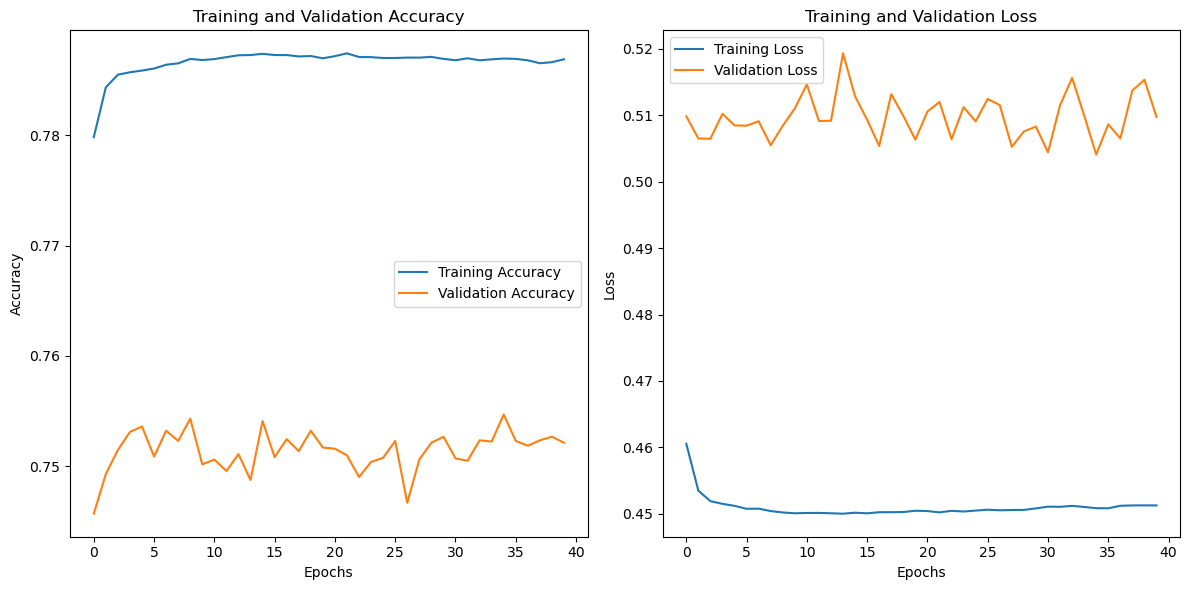

In [76]:
# Entraînement du modèle
history = model.fit(X_oversampled, y_oversampled_encoded, epochs=40, batch_size=32, validation_split=0.01)

# Affichage des courbes d'apprentissage
plt.figure(figsize=(12, 6))

# Exactitude
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Fonction de perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Performances du modèle

In [77]:
# Prédiction des classes de l'échantillon X_test à l'aide de la méthode predict du modèle. 
# Stockage du résultat dans un tableau nommé test_pred.

In [78]:
test_pred = model.predict(X_test)

14324/14324 [==============================] - 40s 3ms/step


In [79]:
print(test_pred[0])

[0.20706794 0.7929321 ]


In [80]:
test_pred.shape

(458348, 2)

In [81]:
print(test_pred)

[[0.20706794 0.7929321 ]
 [0.0511758  0.94882417]
 [0.49370664 0.50629336]
 ...
 [0.04371294 0.956287  ]
 [0.6798102  0.32018977]
 [0.0238674  0.9761326 ]]


In [82]:
"""
la méthode predict du modèle renvoie un vecteur de probabilités où chaque élément est la probabilité d'appartenance
à la classe correspondant à son indice.
"""

"\nla méthode predict du modèle renvoie un vecteur de probabilités où chaque élément est la probabilité d'appartenance\nà la classe correspondant à son indice.\n"

# Encodage de y_test

In [83]:
y_test_class = encoder.fit_transform(y_test)

# Classification binaire sur y_test

In [ ]:
"""
Transformation du problème en une classification à 2 classes; 
Modification de la variable cible pour qu'elle prenne 2 modalités.
Une modalité non grave incluant la catégorie "Indemne" et "Blessé léger"
ET
Une modalité grave incluant la catégorie "Blessé hospitalisé" et "Tué"
"""

In [84]:
y_test_class[y_test_class == 1] = 0

In [85]:
y_test_class[(y_test_class == 2) | (y_test_class == 3)] = 1

In [86]:
y_pred_class = np.argmax(test_pred, axis=1)

In [ ]:
"""
L'argument axis détermine quelle dimension sera parcourue pour calculer argmax.
axis = 1 signifie que la dimension parcourue sera celle des colonnes, ce qui signifie que le résultat sera l'indice
de la valeur maximale de chaque ligne.
argmax : renvoie l'indice de la valeur maximale.
"""

In [87]:
print(y_pred_class)

[1 1 1 ... 1 0 1]


In [88]:
print(y_test_class)

[0 0 1 ... 1 1 1]


In [89]:
# Affichage de la matrice de confusion

In [90]:
cm = pd.crosstab(y_test_class, y_pred_class, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
0,208197,50489
1,49040,150622


In [91]:
# Affichage d'un compte-rendu évaluatif détaillé de la perfomance du modèle grâce à la fonction classification_report
# du sous-module metrics de scikit-learn.

In [92]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81    258686
           1       0.75      0.75      0.75    199662

    accuracy                           0.78    458348
   macro avg       0.78      0.78      0.78    458348
weighted avg       0.78      0.78      0.78    458348



# Conclusion générale 

In [ ]:
"""
Afin de s’affranchir de cette problématique de déséquilibre des classes, un ré-échantillonnage sur les données a été réalisé
au moyen d’une fonction ‘’oversampling’’ en dupliquant aléatoirement des exemples de la classe minoritaire.
Puis, nous avons transformé notre problématique en une classification à 2 classes en modifiant la variable cible
pour qu'elle prenne 2 modalités.
Une modalité non grave incluant la catégorie "Indemne" et "Blessé léger" ainsi qu'une modalité grave incluant la catégorie
"Blessé hospitalisé" et "Tué". 

Puis nous avons défini un modèle séquentiel avec quatre couches Dense, les trois premières implémentent une fonction
d’activation ‘’tanh’’ et la quatrième, à savoir la couche de sortie, utilise une fonction d’activation ‘’softmax’’ 
pour classer en deux catégories.

Pour notre problème spécifique de modélisation prédictive, nous avons opté pour l'expérimentation systématique
afin de découvrir ce qui fonctionne le mieux. 
Nous avons par conséquent joué sur les hyperparamètres du modèle de manière empirique
(nombre de couches, nombre de neurones par couche, nombre d'epoch...) afin d’optimiser l'accuracy. 
Au final, une précision de 78,74 % (valeur max) a été obtenue sur les données d'entraînement, sur la base de 40 epochs
et en utilisant une taille de lot de 32.                        
La précision sur les données de validation est de 75,47 % (valeur max).

La matrice de confusion, ci-dessus, illustre que le nombre de bonnes classifications (sur la diagonale)
est supérieur au nombre de mauvaises classifications. 
Le taux de bonnes prédictions ('accuracy') correspond au nombre d'éléments bien classés sur le nombre total d'individus. 

A partir de la matrice de confusion, l’accuracy peut être calculé  'à la main', le résultat arrondi est d’ailleurs
rigoureusement identique à la précision obtenue dans le rapport de classification.

Calcul de l'accuracy 'à la main' : (208197+150622)/(208197+150622+50489+49040) = 358819/458348 = 78.28 %.


La précision et le rappel sur la classe 0 (indemne et blessé léger) sont plutôt satisfaisants,                                              ils sont respectivement de 81 % et 80 % : cette classe a été bien gérée par le modèle.              Le F1-score, qui permet de mesurer la précision et le rappel à la fois, est de 81 %.
La précision et le rappel sur la classe 1 (blessé hospitalisé et tué) qui nous intéresse tout particulièrement
sont également satisfaisants, ils sont tous les deux de 75 % : cette classe a également été bien gérée par le modèle. 
Le F1-score est logiquement de 75 %.
La performance de ce modèle est relativement satisfaisante et la classification binaire a permis de solutionner
notre problématique de déséquilibre de classes.
De surcroît, en analysant les courbes d'apprentissage, celles-ci montrent que nous n’avons plus d’overfitting
(surapprentissage) comme c’était le cas avec les modèles précédents. 

La performance de ce modèle est relativement satisfaisante grâce à la classification binaire qui nous a permis
de solutionner notre problématique de déséquilibre de classes.
"""